In [3]:
#!pip install opencv-python

In [2]:
#conda install tensorflow-gpu==1.13.1
#conda install keras==2.2.4

In [4]:
import numpy as np
import pickle
import cv2
import os
from os import listdir
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [5]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam

In [6]:
default_image_size = tuple((348, 348))
## Function to convert image to array of 348 X 348
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

### Reading encoded Lables mappings

In [9]:
e_lables = pd.read_csv("GroceryStoreDataset-master/dataset/classes.csv")

In [122]:
'''
print(image)
df = e_lables.loc[e_lables['Class'] == image_sub_cat_name]
print(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID )
#print(e_lables[e_lables.Class == image_sub_cat_name ])
'''

"\nprint(image)\ndf = e_lables.loc[e_lables['Class'] == image_sub_cat_name]\nprint(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID )\n#print(e_lables[e_lables.Class == image_sub_cat_name ])\n"

### Reading images[image_list_a] and correspoding lables[label_list]

In [100]:
image_list_a, label_list = [], []

totalImage = 0  # it is used to control total numbe of images for each class

root_dir = listdir("GroceryStoreDataset-master/dataset/test2") # Specify location of plant images

for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    
    
    image_list = listdir(f"GroceryStoreDataset-master/dataset/test2/{image_folder}")
    
    for image in image_list:
               
        image_sub_cat = listdir(f"GroceryStoreDataset-master/dataset/test2/{image_folder}/{image}")
     
        for image_sub_cat_name in image_sub_cat:
        
            #print(image_sub_cat_name)
            path  = f"GroceryStoreDataset-master/dataset/test2/{image_folder}/{image}/{image_sub_cat_name}"
            
            if os.path.isdir(path):  
                image_sub_cat_name_jpg = listdir(f"GroceryStoreDataset-master/dataset/test2/{image_folder}/{image}/{image_sub_cat_name}")
                
                for image_name in image_sub_cat_name_jpg:
                    #print(image_sub_cat_name)
                    #print(label_list.append(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]))
                    label_list.append(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0])
                    if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                        image_full_path = f"GroceryStoreDataset-master/dataset/test2/{image_folder}/{image}/{image_sub_cat_name}/{image_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))
                    
            if os.path.isfile(path):
                #print(image_sub_cat_name)
                label_list.append(e_lables.loc[e_lables['Class'] == image].Class_ID.iloc[0])
                
                if image_sub_cat_name.endswith(".jpg") == True or image_sub_cat_name.endswith(".JPG") == True:
                        image_full_path = f"GroceryStoreDataset-master/dataset/test2/{image_folder}/{image}/{image_sub_cat_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))
            
        '''
        image_name = f"PlantVillage/{image_folder}/"+image
        if isinstance(image_name, str) == True:
            if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                image_list_a.append(convert_image_to_array(image_name))
                label_list.append(image_folder)
        totalImage = totalImage+1
        if(totalImage>=20):          
            break
       '''   
        

# Convert images_list_a and lable_list to numpy array
image_list_a = np.asarray(image_list_a)
label_list = np.asarray(label_list)

### Total 12 samples, each is of 348 X 348 and having 3 channels

In [102]:
print(label_list.shape, image_list_a.shape)

(12,) (12, 348, 348, 3)


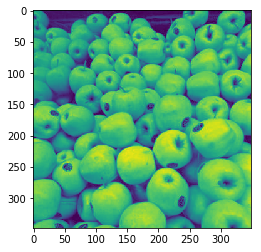

In [103]:
plt.imshow(image_list_a[0][: ,: ,1])

In [130]:
n_classes = 6

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)


In [124]:
# Split data in train and test
image_list_a = np.asarray(image_list_a)
x_train, x_test, y_train, y_test = train_test_split(image_list_a, label_list, test_size=0.1, random_state = 42)

In [125]:
EPOCHS = 3
INIT_LR = 0.001
BS = 32
width=348
height=348
depth=3
inputShape = (height, width, depth)
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]) 
chanDim = 1


# Develope  model
model = Sequential()
model.add(Conv2D(4, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(524))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 348, 348, 4)       112       
_________________________________________________________________
activation_13 (Activation)   (None, 348, 348, 4)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 348, 348, 4)       1392      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 116, 116, 4)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 116, 116, 4)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 524)               28204300  
__________

In [126]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [127]:
history = model.fit(x_train, y_train, batch_size=32,validation_data=(x_test, y_test), epochs=EPOCHS, verbose=1)

Train on 10 samples, validate on 2 samples
Epoch 1/3
10/10 [==============================] - 4s 370ms/step - loss: -266.2378 - acc: 0.2000 - val_loss: -852.9176 - val_acc: 0.0000e+00
Epoch 2/3
10/10 [==============================] - 1s 99ms/step - loss: -266.2379 - acc: 0.2000 - val_loss: -852.9176 - val_acc: 0.0000e+00
Epoch 3/3
10/10 [==============================] - 1s 101ms/step - loss: -266.2378 - acc: 0.2000 - val_loss: -852.9176 - val_acc: 0.0000e+00


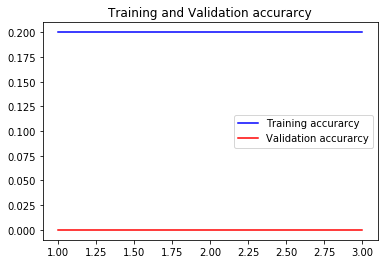

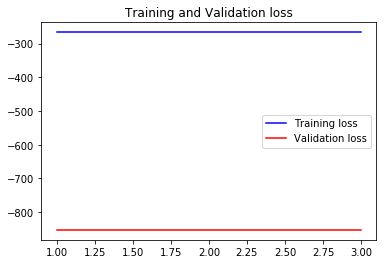

In [128]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [129]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 28ms/step


[-852.9176025390625, 0.0]